In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import dbcv
from sklearn.cluster import DBSCAN
import hdbscan
from DBSCANPP import DBSCANPP
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

In [3]:
#Importo tutti i datasets forniti
dt_neuroblastoma = pd.read_csv(r"C:\Users\Alessandro\Desktop\EHR_datasets\10_7717_peerj_5665_dataYM2018_neuroblastoma.csv")
dt_sepsis = pd.read_csv(r"C:\Users\Alessandro\Desktop\EHR_datasets\journal.pone.0148699_S1_Text_Sepsis_SIRS_EDITED.csv")
dt_depression_heart_pressure = pd.read_csv(r"C:\Users\Alessandro\Desktop\EHR_datasets\journal.pone.0158570_S2File_depression_heart_failure_v2.csv")
dt_cardiac_arrest = pd.read_csv(r"C:\Users\Alessandro\Desktop\EHR_datasets\journal.pone.0175818_S1Dataset_Spain_cardiac_arrest_EDITED..csv")
dt_diabetes = pd.read_csv(r"C:\Users\Alessandro\Desktop\EHR_datasets\journal.pone.0216416_Takashi2019_diabetes_type1_dataset_preprocessed.csv")

In [5]:
dt_neuroblastoma_clean = dt_neuroblastoma.dropna()
dt_neuroblastoma_clean

,age,sex,site,stage,risk,time_months,autologous_stem_cell_transplantation,radiation,degree_of_differentiation,UH_or_FH,MYCN_status,surgical_methods,outcome
0,2.0,0,0,1.0,1,7,0,0,0,0,1,1,0.0
1,2.0,0,0,1.0,1,19,0,1,0,0,1,1,1.0
2,1.0,0,0,1.0,1,25,0,1,1,0,1,0,1.0
3,1.0,0,0,1.0,1,8,0,0,1,0,1,1,0.0
4,1.0,0,0,1.0,1,47,1,1,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0,0,0.0,0,36,0,0,0,0,1,0,0.0
165,1.0,0,0,0.0,0,18,0,0,1,1,1,1,1.0
166,1.0,1,1,0.0,0,38,0,0,2,1,1,0,0.0
167,1.0,1,1,0.0,0,37,0,0,1,1,1,0,0.0


In [7]:
dt_neuroblastoma_clean['sex'].value_counts()

sex
0    110
1     59
Name: count, dtype: int64

In [9]:
dt_neuroblastoma_clean['stage'].value_counts()

stage
1.0    116
0.0     53
Name: count, dtype: int64

In [11]:
dt_neuroblastoma_clean['site'].value_counts()

site
0    142
1     18
2      9
Name: count, dtype: int64

In [13]:
dt_neuroblastoma_clean['risk'].value_counts()

risk
1    137
0     32
Name: count, dtype: int64

In [15]:
dt_neuroblastoma_clean['autologous_stem_cell_transplantation'].value_counts()

autologous_stem_cell_transplantation
0    155
1     14
Name: count, dtype: int64

In [17]:
dt_neuroblastoma_clean['radiation'].value_counts()

radiation
1    109
0     60
Name: count, dtype: int64

In [19]:
dt_neuroblastoma_clean['degree_of_differentiation'].value_counts()

degree_of_differentiation
1    94
0    66
2     9
Name: count, dtype: int64

In [21]:
dt_neuroblastoma_clean['UH_or_FH'].value_counts()

UH_or_FH
0    136
1     33
Name: count, dtype: int64

In [23]:
dt_neuroblastoma_clean['outcome'].value_counts()

outcome
0.0    92
1.0    77
Name: count, dtype: int64

In [25]:
dt_neuroblastoma_clean['surgical_methods'].value_counts()

surgical_methods
0    111
1     58
Name: count, dtype: int64

In [27]:
dt_neuroblastoma_clean.dtypes

age                                     float64
sex                                      object
site                                     object
stage                                   float64
risk                                     object
time_months                              object
autologous_stem_cell_transplantation     object
radiation                                object
degree_of_differentiation                object
UH_or_FH                                 object
MYCN_status                              object
surgical_methods                         object
outcome                                 float64
dtype: object

In [29]:
dt_neuroblastoma_clean['time_months'] = pd.to_numeric(dt_neuroblastoma_clean['time_months'], errors='coerce')

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_7200\1122516187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_neuroblastoma_clean['time_months'] = pd.to_numeric(dt_neuroblastoma_clean['time_months'], errors='coerce')


In [31]:
dt_neuroblastoma_clean['outcome'] = dt_neuroblastoma_clean['outcome'].astype('object')

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_7200\1322491475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_neuroblastoma_clean['outcome'] = dt_neuroblastoma_clean['outcome'].astype('object')


In [33]:
dt_neuroblastoma_clean.dtypes

age                                     float64
sex                                      object
site                                     object
stage                                   float64
risk                                     object
time_months                             float64
autologous_stem_cell_transplantation     object
radiation                                object
degree_of_differentiation                object
UH_or_FH                                 object
MYCN_status                              object
surgical_methods                         object
outcome                                  object
dtype: object

In [35]:
#Variabili categoriche binarie 
#sex, risk, autologous_stem_cell_transplantation, radiation, UH_or_FH, surgical_methods
df_encoded = dt_neuroblastoma_clean.copy()

In [269]:
categorical_binary_cols = ['sex', 'stage', 'risk', 'radiation', 'autologous_stem_cell_transplantation','UH_or_FH', 'MYCN_status ', 'surgical_methods', 'outcome']
categorical_multiclass = ['site', 'degree_of_differentiation']
colonne_numeriche = ['age', 'time_months']

for i in categorical_binary_cols:
    df_encoded[i] = df_encoded[i].astype('int')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colonne_numeriche),
        ('cat', OneHotEncoder(sparse_output=False, drop = 'first'), categorical_multiclass),
        ('bin', 'passthrough', categorical_binary_cols)
    ])
X_processed = preprocessor.fit_transform(df_encoded)

In [271]:
X_processed

array([[ 1.39722159, -1.27054557,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.39722159, -0.74805415,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.19825441, -0.48680845,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.19825441,  0.07922392,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.19825441,  0.03568297,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.79373042, -0.18202179,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [273]:
X_processed.shape

(169, 15)

In [275]:
df_X = pd.DataFrame(X_processed)
df_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.397222,-1.270546,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.397222,-0.748054,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,-0.198254,-0.486808,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-0.198254,-1.227005,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.198254,0.471092,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,-1.793730,-0.007858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
165,-0.198254,-0.791595,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
166,-0.198254,0.079224,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
167,-0.198254,0.035683,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [277]:
variances = df_X.var()
variances.sort_values()

3     0.050719
5     0.050719
10    0.076430
2     0.095731
8     0.154410
11    0.158073
12    0.196534
7     0.216540
13    0.226754
6     0.228586
9     0.230347
4     0.248309
14    0.249507
1     1.005952
0     1.005952
dtype: float64

In [125]:
pca = PCA(n_components=2)  # Mantieni il 95% della varianza
X_reduced = pca.fit_transform(X_processed)

In [127]:
df_X_reduced = pd.DataFrame(X_reduced)
df_X_reduced

,0,1
0,-0.585608,0.493006
1,-1.119137,0.054701
2,-0.095256,-0.897794
3,0.310354,-0.395802
4,-0.123463,-0.937043
...,...,...
164,0.435868,1.103392
165,1.056319,0.358472
166,1.454913,1.376683
167,1.726781,0.707613


In [69]:
#Applichiamo l'algoritmo DBSCAN su X_processed
def calculate_dbcv(X, eps, min_samples):
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    labels = dbscan.fit_predict(X)
    score = dbcv.dbcv(X, labels, check_duplicates = False)
    return score, labels

def calculate_labels(labels):
    n_rumore = np.sum(labels == -1)
    n_total = len(labels)
    percentuale_rumore = (n_rumore / n_total) * 100
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return percentuale_rumore, n_clusters


In [71]:
eps_values = np.arange(0.1, 3.1, 0.1)
min_samples_values = np.arange(5, 40, 5)

#dbcv_results = pd.DataFrame(columns = min_samples_values, index = eps_values)
risultati = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbcv_score, labels = calculate_dbcv(X_reduced, eps, min_samples)
        percentuale_rumore, n_clusters = calculate_labels(labels)
        risultati.append({
            "eps": eps,
            "min_samples": min_samples,
            "dbcv": dbcv_score,
            "noise_%": percentuale_rumore,
            "n_clusters": n_clusters
        })
        #dbcv_results.loc[eps, min_samples] = risultati

df_results = pd.DataFrame(risultati)
df_results

,eps,min_samples,dbcv,noise_%,n_clusters
0,0.1,5,0.069286,92.899408,2
1,0.1,10,0.000000,100.000000,0
2,0.1,15,0.000000,100.000000,0
3,0.1,20,0.000000,100.000000,0
4,0.1,25,0.000000,100.000000,0
...,...,...,...,...,...
205,3.0,15,1.000000,0.000000,1
206,3.0,20,1.000000,0.000000,1
207,3.0,25,1.000000,0.000000,1
208,3.0,30,1.000000,0.000000,1


In [123]:
sdggsdbv = df_results[(df_results['n_clusters'] > 1)]
sdggsdbv

,eps,min_samples,dbcv,noise_%,n_clusters
35,0.6,5,0.005939,98.329356,3
42,0.7,5,0.031206,95.226730,4
49,0.8,5,0.050924,90.214797,7
56,0.9,5,0.055789,83.452665,8
57,0.9,10,0.039288,92.203660,3
63,1.0,5,0.042456,76.849642,6
64,1.0,10,0.029591,84.884646,3
65,1.0,15,0.046458,91.885442,2
66,1.0,20,0.037502,93.556086,2
70,1.1,5,-0.005625,70.326173,3


In [81]:
fsdfdg = df_results[(df_results['dbcv'] > 0.50)]
fsdfdg

,eps,min_samples,dbcv,noise_%,n_clusters
98,1.5,5,0.958580,4.142012,1
99,1.5,10,0.911243,8.875740,1
100,1.5,15,0.834320,16.568047,1
101,1.5,20,0.798817,20.118343,1
102,1.5,25,0.775148,22.485207,1
...,...,...,...,...,...
205,3.0,15,1.000000,0.000000,1
206,3.0,20,1.000000,0.000000,1
207,3.0,25,1.000000,0.000000,1
208,3.0,30,1.000000,0.000000,1


In [62]:
eps_values = np.arange(1.8, 4.1, 0.1)
min_samples_values = np.arange(15, 26, 5)
dbcv_results_2 = pd.DataFrame(columns = min_samples_values, index = eps_values)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbcv_score = calculate_dbcv(X_processed, eps, min_samples)
        dbcv_results_2.loc[eps, min_samples] = dbcv_score

dbcv_results_2

,15,20,25
1.8,0.597633,0.497041,0.343195
1.9,0.633136,0.609467,0.538462
2.0,0.64497,0.639053,0.60355
2.1,0.175253,0.650888,0.650888
2.2,0.899408,0.698225,0.698225
2.3,0.946746,0.887574,0.721893
2.4,0.988166,0.970414,0.940828
2.5,0.994083,0.988166,0.952663
2.6,1.0,1.0,0.994083
2.7,1.0,1.0,1.0


In [116]:
#Percentuale del rumore
db = DBSCAN(eps = 1.6, min_samples = 5)
labels_dbscan = db.fit_predict(X_processed)

In [118]:
labels_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,  2,  2,  3,  2, -1,
       -1,  3,  2,  3, -1,  3,  2,  3, -1, -1, -1, -1,  1,  3,  3, -1],
      dtype=int64)

In [120]:
n_total_labels = len(labels_dbscan)
n_noise = np.sum(labels_dbscan == -1)
percentuale_noise = n_noise/n_total_labels * 100

In [122]:
percentuale_noise

27.810650887573964

In [64]:
#Applichiamo HDBSCAN su X_processed
#Applichiamo l'algoritmo DBSCAN su X_processed
def calculate_dbcv_hdbscan(X, min_cluster_size, min_samples):
    clusterer = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size, min_samples = min_samples)
    labels = clusterer.fit_predict(X)
    score = dbcv.dbcv(X, labels, check_duplicates = False)
    return score

In [68]:
min_cluster_size_vals = range(5, 51, 5)
min_samples_vals = range(5, 51, 5)

dbcv_results_hdbscan = pd.DataFrame(columns = min_samples_vals, index = min_cluster_size_vals)

for min_cluster_size in min_cluster_size_vals:
    for min_samples in min_samples_vals:
        dbcv_score = calculate_dbcv_hdbscan(X_processed, min_cluster_size, min_samples)
        dbcv_results_hdbscan.loc[min_cluster_size, min_samples] = dbcv_score

dbcv_results_hdbscan

,5,10,15,20,25,30,35,40,45,50
5,0.149926,0.314997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.149926,0.314997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.149926,0.314997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.149926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.149926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.149926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.149926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.149926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
min_cluster_range = range(4, 12)
min_samples_range = range(8, 14)

dbcv_results_hdbscan_2 = pd.DataFrame(columns = min_samples_range, index = min_cluster_range)

for min_cluster_size in min_cluster_range:
    for min_samples in min_samples_range:
        dbcv_score = calculate_dbcv_hdbscan(X_processed, min_cluster_size, min_samples)
        dbcv_results_hdbscan_2.loc[min_cluster_size, min_samples] = dbcv_score

dbcv_results_hdbscan_2

,8,9,10,11,12,13
4,0.343549,0.324004,0.314997,0.284138,0.277239,0.275131
5,0.343549,0.324004,0.314997,0.284138,0.277239,0.275131
6,0.343549,0.324004,0.314997,0.284138,0.277239,0.275131
7,0.343549,0.324004,0.314997,0.284138,0.277239,0.275131
8,0.343549,0.324004,0.314997,0.284138,0.277239,0.0
9,0.343549,0.324004,0.314997,0.284138,0.0,0.0
10,0.343549,0.324004,0.314997,0.284138,0.0,0.0
11,0.343549,0.324004,0.314997,0.0,0.0,0.0


In [85]:
dt_sepsis = dt_sepsis.dropna()
dt_sepsis

,Age,sex_woman,diagnosis_0EC_1M_2_AC,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,Group,LOS-ICU,Mortality
0,23,0,2,14,0,0.02,10.48,8.66,1.22,40,7.1,176,10.0,0,1,0
1,53,0,2,10,3,9.00,19.16,16.28,0.62,0,26.3,280,10.8,0,1,0
2,83,0,2,8,4,11.91,12.60,9.91,0.72,0,13.8,98,9.2,0,1,0
3,35,0,2,3,0,7.38,7.70,5.97,0.94,20,6.4,254,7.9,0,1,0
4,86,0,2,17,2,4.97,10.64,9.73,0.78,0,12.5,133,11.8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,84,1,1,18,3,0.30,6.71,5.26,0.81,30,6.5,145,9.7,0,6,0
1253,30,1,1,3,0,0.10,7.89,3.43,3.47,30,1.0,268,10.3,0,1,0
1254,62,1,1,19,6,4.50,4.49,3.53,0.31,20,11.4,188,8.6,0,15,0
1255,31,1,1,16,5,2.00,8.40,6.69,0.76,20,8.8,164,9.0,1,4,0


In [89]:
dt_sepsis['diagnosis_0EC_1M_2_AC'].value_counts()

diagnosis_0EC_1M_2_AC
0    616
1    595
2     46
Name: count, dtype: int64

In [91]:
variabili_categoriche_binarie = ['sex_woman', 'Group', 'Mortality']
variabili_categoriche_multiclass = ['diagnosis_0EC_1M_2_AC']
variabili_numeriche = ['Age', 'APACHE II', 'SOFA', 'CRP', 'WBCC', 'NeuC', 'LymC', 'EOC', 'NLCR', 'PLTC', 'MPV', 'LOS-ICU']

In [173]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variabili_numeriche),
        ('cat', OneHotEncoder(sparse_output=False, drop = 'first'), variabili_categoriche_multiclass),
        ('bin', 'passthrough', variabili_categoriche_binarie)
    ]
)
X_processed_2 = preprocessor.fit_transform(dt_sepsis)

In [175]:
X_processed_2

array([[-1.74257392,  0.08084869, -0.79394818, ...,  0.        ,
         0.        ,  0.        ],
       [-0.18233785, -0.40657004,  0.12841121, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.37789821, -0.6502794 ,  0.43586434, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28573297,  0.6901221 ,  1.0507706 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.32651096,  0.32455805,  0.74331747, ...,  1.        ,
         1.        ,  0.        ],
       [-0.33836146, -1.01584344, -0.48649505, ...,  0.        ,
         0.        ,  0.        ]])

In [177]:
X_processed_2.shape

(1257, 17)

In [179]:
#Recuperare i nomi delle variabili
nomi_var_numeriche = variabili_numeriche
ohe = preprocessor.named_transformers_['cat']
nomi_var_cat_multi = ohe.get_feature_names_out(variabili_categoriche_multiclass)
nomi_var_cat_binarie = variabili_categoriche_binarie

nomi_colonne = list(nomi_var_numeriche) + list(nomi_var_cat_multi) + list(nomi_var_cat_binarie)

In [181]:
X_processed_df = pd.DataFrame(X_processed_2, columns = nomi_colonne)
X_processed_df

,Age,APACHE II,SOFA,CRP,WBCC,NeuC,LymC,EOC,NLCR,PLTC,MPV,LOS-ICU,diagnosis_0EC_1M_2_AC_1,diagnosis_0EC_1M_2_AC_2,sex_woman,Group,Mortality
0,-1.742574,0.080849,-0.793948,-0.748367,-0.216099,-0.232444,0.245522,0.301910,-0.393661,-0.170728,-0.034330,-0.403142,0.0,1.0,0.0,0.0,0.0
1,-0.182338,-0.406570,0.128411,0.341697,1.240285,1.195390,-0.548703,-0.644477,0.862574,0.796254,0.180669,-0.403142,0.0,1.0,0.0,0.0,0.0
2,1.377898,-0.650279,0.435864,0.694936,0.139608,0.001781,-0.416332,-0.644477,0.044712,-0.895964,-0.249330,-0.403142,0.0,1.0,0.0,0.0,0.0
3,-1.118479,-1.259553,-0.793948,0.145049,-0.682544,-0.736496,-0.125116,-0.171283,-0.439462,0.554509,-0.598704,-0.403142,0.0,1.0,0.0,0.0,0.0
4,1.533922,0.446413,-0.179042,-0.147497,-0.189253,-0.031948,-0.336910,-0.644477,-0.040345,-0.570538,0.449418,-0.403142,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1.429906,0.568267,0.128411,-0.714379,-0.848652,-0.869535,-0.297199,0.065314,-0.432919,-0.458963,-0.114955,0.183510,1.0,0.0,1.0,0.0,0.0
1253,-1.378519,-1.259553,-0.793948,-0.738656,-0.650665,-1.212440,3.223869,0.065314,-0.792778,0.684679,0.046295,-0.403142,1.0,0.0,1.0,0.0,0.0
1254,0.285733,0.690122,1.050771,-0.204549,-1.221138,-1.193702,-0.959053,-0.171283,-0.112317,-0.059153,-0.410579,1.239483,1.0,0.0,1.0,0.0,0.0
1255,-1.326511,0.324558,0.743317,-0.508019,-0.565094,-0.601582,-0.363384,-0.171283,-0.282432,-0.282303,-0.303079,-0.051151,1.0,0.0,1.0,1.0,0.0


In [183]:
variances = X_processed_df.var()
variances

Age                        1.000796
APACHE II                  1.000796
SOFA                       1.000796
CRP                        1.000796
WBCC                       1.000796
NeuC                       1.000796
LymC                       1.000796
EOC                        1.000796
NLCR                       1.000796
PLTC                       1.000796
MPV                        1.000796
LOS-ICU                    1.000796
diagnosis_0EC_1M_2_AC_1    0.249488
diagnosis_0EC_1M_2_AC_2    0.035284
sex_woman                  0.241749
Group                      0.227931
Mortality                  0.092167
dtype: float64

In [185]:
#Rimuoviamo le colonne/variabili con varianza < 0.1
#selector = VarianceThreshold(threshold=0.1)
#X_reduced_1 = selector.fit_transform(X_processed_df)
#mask = selector.get_support()
#colonne_mantenute = X_processed_df.columns[mask]

#X_reduced_1_df = pd.DataFrame(X_reduced_1, columns = colonne_mantenute)
#X_reduced_1_df

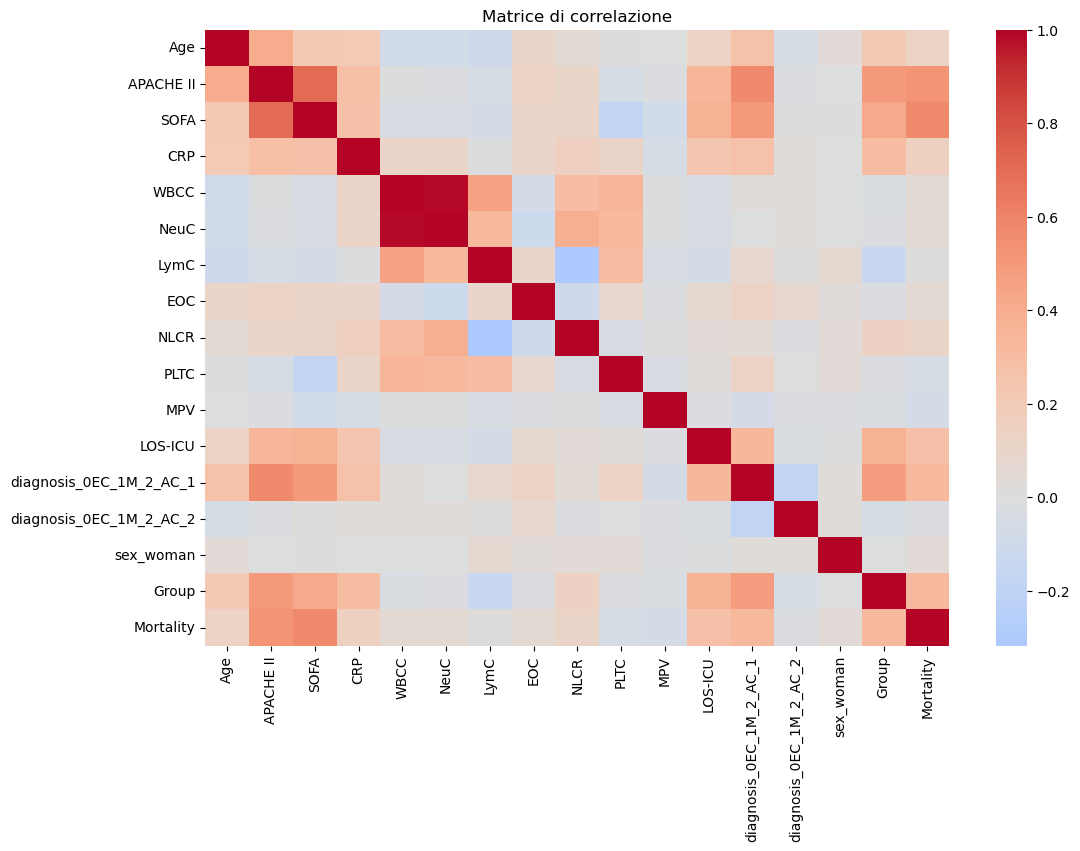

In [187]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_processed_df.corr(), cmap='coolwarm', center=0)
plt.title("Matrice di correlazione")
plt.show()

In [189]:
#pca = PCA(n_components=0.95)  # Mantieni il 95% della varianza
#X_reduced_2 = pca.fit_transform(X_processed_2)

In [191]:
eps_values = np.arange(0.1, 3.1, 0.1)
min_samples_values = np.arange(5, 40, 5)

#dbcv_results = pd.DataFrame(columns = min_samples_values, index = eps_values)
risultati_2 = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbcv_score, labels = calculate_dbcv(X_processed_df, eps, min_samples)
        percentuale_rumore, n_clusters = calculate_labels(labels)
        risultati_2.append({
            "eps": eps,
            "min_samples": min_samples,
            "dbcv": dbcv_score,
            "noise_%": percentuale_rumore,
            "n_clusters": n_clusters
        })
        #dbcv_results.loc[eps, min_samples] = risultati

df_results = pd.DataFrame(risultati)
df_results

,eps,min_samples,dbcv,noise_%,n_clusters
0,0.1,5,0.069286,92.899408,2
1,0.1,10,0.000000,100.000000,0
2,0.1,15,0.000000,100.000000,0
3,0.1,20,0.000000,100.000000,0
4,0.1,25,0.000000,100.000000,0
...,...,...,...,...,...
205,3.0,15,1.000000,0.000000,1
206,3.0,20,1.000000,0.000000,1
207,3.0,25,1.000000,0.000000,1
208,3.0,30,1.000000,0.000000,1


In [261]:
df_risultati_filtrato = df_results[df_results['n_clusters'] > 1]

In [263]:
df_risultati_filtrato

,eps,min_samples,dbcv,noise_%,n_clusters
0,0.1,5,0.069286,92.899408,2
7,0.2,5,0.069286,92.899408,2
14,0.3,5,0.069286,92.899408,2
21,0.4,5,0.195667,78.698225,6
28,0.5,5,0.195667,78.698225,6
35,0.6,5,0.195667,78.698225,6
42,0.7,5,0.195667,78.698225,6
49,0.8,5,0.195667,78.698225,6
56,0.9,5,0.195667,78.698225,6
63,1.0,5,0.271570,37.869822,4


In [ ]:
eps_values = np.arange(0.1, 3.1, 0.1)
min_samples_values = np.arange(5, 40, 5)

In [199]:
lkjnonj = df_results[(df_results['dbcv'] > 0.5)]
lkjnonj

,eps,min_samples,dbcv,noise_%,n_clusters
98,1.5,5,0.958580,4.142012,1
99,1.5,10,0.911243,8.875740,1
100,1.5,15,0.834320,16.568047,1
101,1.5,20,0.798817,20.118343,1
102,1.5,25,0.775148,22.485207,1
...,...,...,...,...,...
205,3.0,15,1.000000,0.000000,1
206,3.0,20,1.000000,0.000000,1
207,3.0,25,1.000000,0.000000,1
208,3.0,30,1.000000,0.000000,1
